In [1]:
import pandas as pd
from scripts.common.outliers import *
from scripts.common.clustering import *
from scripts.common.standardization import *
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10, 10]

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [2]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii             2006   
1                              Super Mario Bros.      NES             1985   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
4                       Pokemon Red/Pokemon Blue       GB             1996   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2             2006   
10448                                    Deus Ex       PC             2000   
10449                  Monster Rancher Advance 2      GBA             2002   
10450                              Karnaaj Rally      GBA             2003   
10451                Wade Hixton's Counter Punch      GBA             2004   

              Genre  NA_Sales  EU_Sales  JP_Sales  Global_Sales

### Data stats for each column

In [3]:
columns_to_get_stats_from = ["Global_Sales", "User_Score", "Critic_Score",
                             "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]
stats_to_compute = ["max", "min", "std", "mean", "median"]
columns_stats = data.agg({item: stats_to_compute for item in columns_to_get_stats_from})
print(columns_stats.to_string())

        Global_Sales  User_Score  Critic_Score   EU_Sales   NA_Sales   JP_Sales  Year_of_Release
max        82.530000    9.600000     99.000000  28.960000  41.360000  10.220000      2016.000000
min         0.010000    0.000000     13.000000   0.000000   0.000000   0.000000      1977.000000
std         1.904295    1.297881     12.566314   0.622661   1.002670   0.385861         6.070377
mean        0.810365    7.270386     71.128760   0.225307   0.402908   0.108312      2006.003636
median      0.360000    7.500000     72.400000   0.070000   0.170000   0.000000      2007.000000


### Stats per year of release

<AxesSubplot:xlabel='Year_of_Release'>

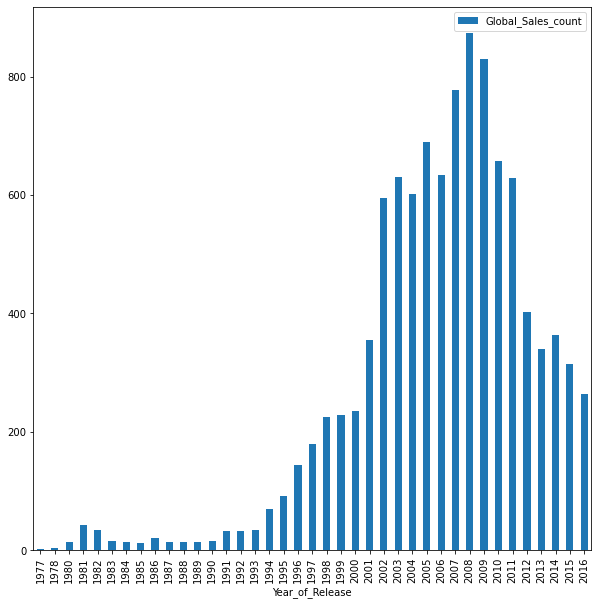

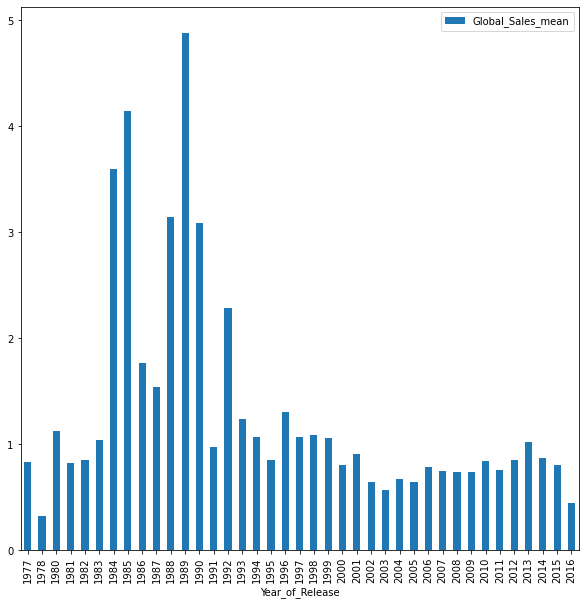

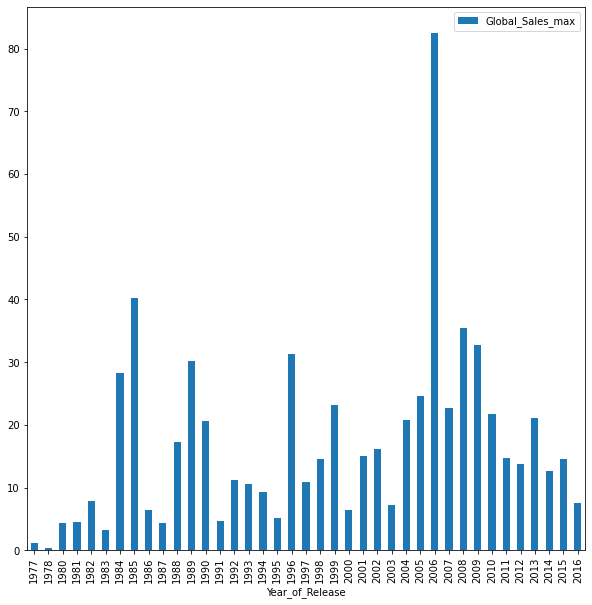

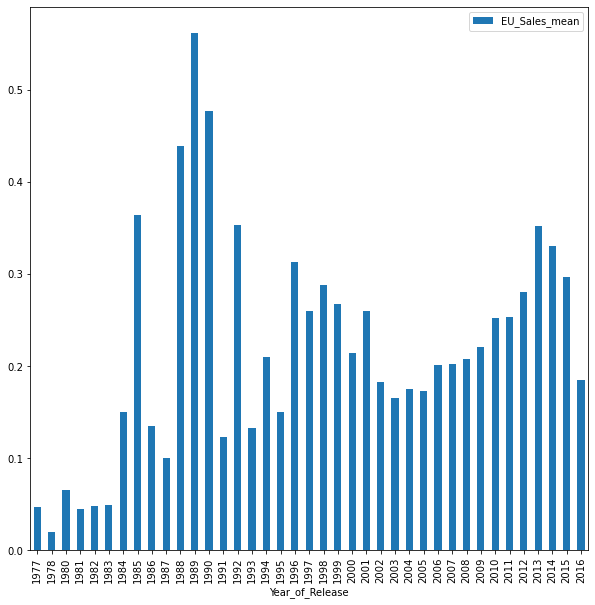

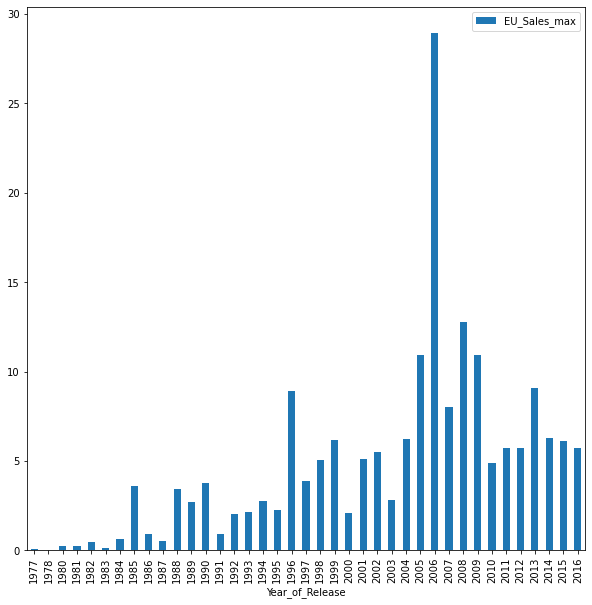

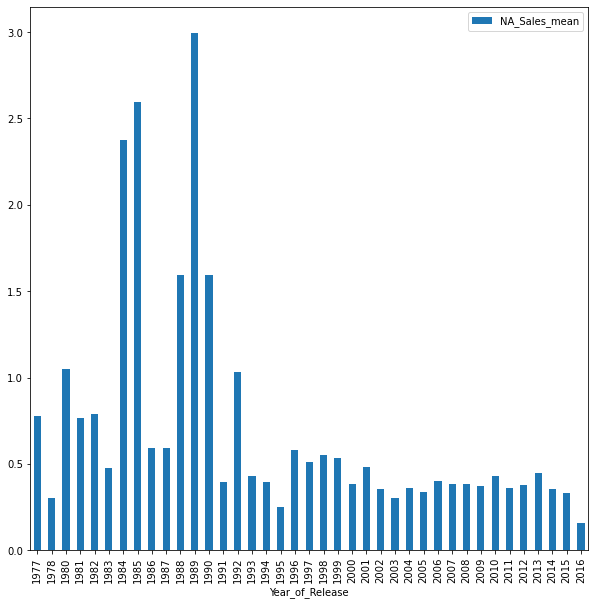

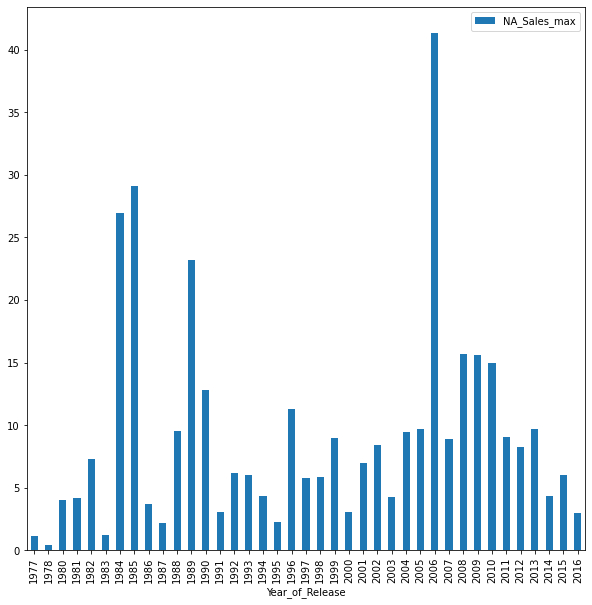

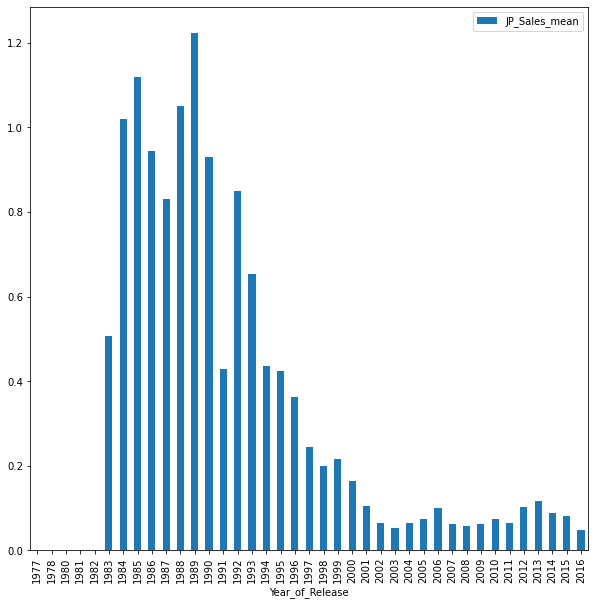

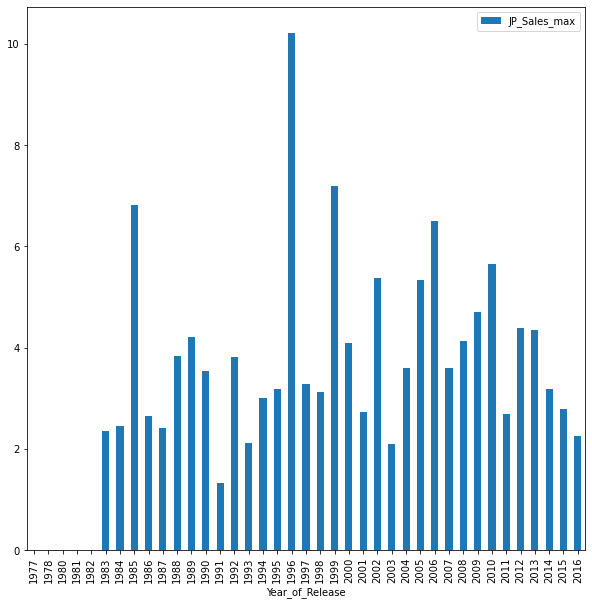

In [4]:
number_of_entries_by_years = data\
    .filter(["Year_of_Release", "Global_Sales", "EU_Sales", "NA_Sales", "JP_Sales"])\
    .groupby("Year_of_Release").agg(["mean", "count", "max"])
number_of_entries_by_years.columns = ['_'.join(col).strip()
                                      for col in number_of_entries_by_years.columns.values]

number_of_entries_by_years.plot.bar(y="Global_Sales_count")
number_of_entries_by_years.plot.bar(y="Global_Sales_mean")
number_of_entries_by_years.plot.bar(y="Global_Sales_max")

number_of_entries_by_years.plot.bar(y="EU_Sales_mean")
number_of_entries_by_years.plot.bar(y="EU_Sales_max")

number_of_entries_by_years.plot.bar(y="NA_Sales_mean")
number_of_entries_by_years.plot.bar(y="NA_Sales_max")

number_of_entries_by_years.plot.bar(y="JP_Sales_mean")
number_of_entries_by_years.plot.bar(y="JP_Sales_max")

### Data standardization

In [5]:
columns_to_standardize = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales",
                          "NA_Sales", "JP_Sales", "Year_of_Release"]
standardize(data, columns_to_standardize, columns_stats)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii        -0.000599   
1                              Super Mario Bros.      NES        -3.460022   
2                                 Mario Kart Wii      Wii         0.328870   
3                              Wii Sports Resort      Wii         0.493604   
4                       Pokemon Red/Pokemon Blue       GB        -1.647943   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2        -0.000599   
10448                                    Deus Ex       PC        -0.989005   
10449                  Monster Rancher Advance 2      GBA        -0.659537   
10450                              Karnaaj Rally      GBA        -0.494802   
10451                Wade Hixton's Counter Punch      GBA        -0.330068   

              Genre   NA_Sales   EU_Sales   JP_Sales  Global_Sa

### Outliers - 1D

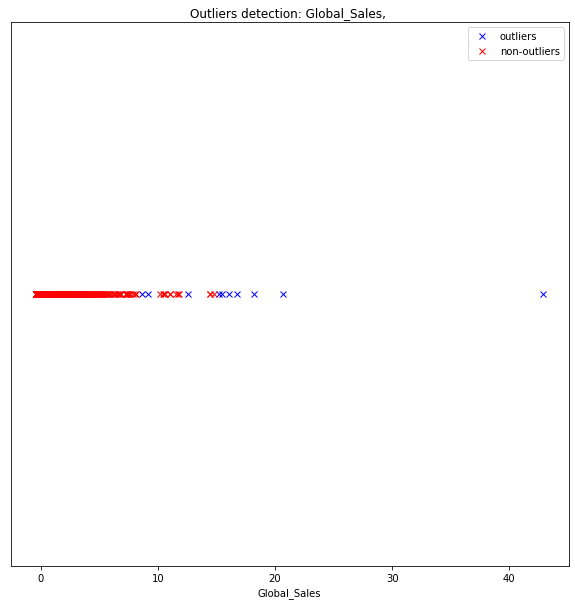

Outliers according to column Global_Sales
Wii Sports: 42.91332813369049
Super Mario Bros.: 20.705634016604392
Mario Kart Wii: 18.22702639701001
Wii Sports Resort: 16.782922381356506
Nintendogs: 12.529379644340723
Pokemon Red/Pokemon Blue: 16.047742155205633
Tetris: 15.46484926161458
Pokemon Diamond/Pokemon Pearl: 9.158053178705993
Super Mario Bros. 3: 8.648678307730028
New Super Mario Bros.: 15.22329004445072

Outliers according to column User_Score
My Little Pony: Pinkie Pie's Party: -5.601736330186982
Happy Feet: -5.370590281276455
Pool Party: -5.062395549395754
Deal or No Deal: -4.13781135375365
FIFA Soccer 13: -4.368957402664176
Harvest Moon: Friends of Mineral Town: 1.7949372349498516
NHL 15: -4.368957402664176
AMF Bowling World Lanes: -4.754200817515053
Tony Hawk's Pro Skater 5: -4.446006085634351
World Destruction League: Thunder Tanks: -4.677152134544877

Outliers according to column Critic_Score
Ride to Hell: -4.625760426622474
Leisure Suit Larry: Box Office Bust: -4.307449117

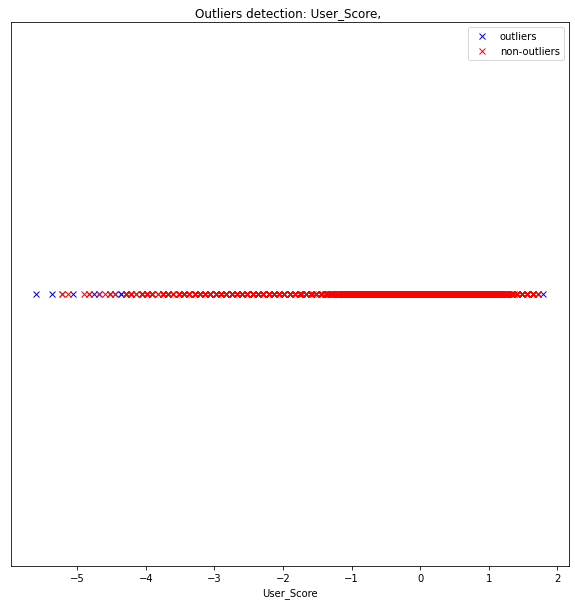

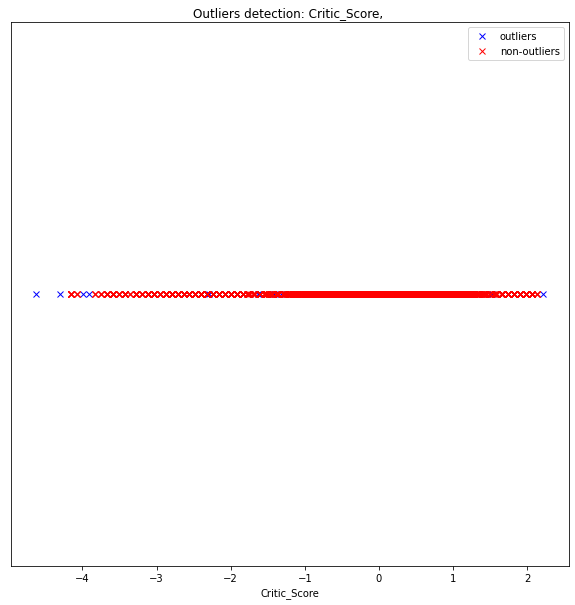

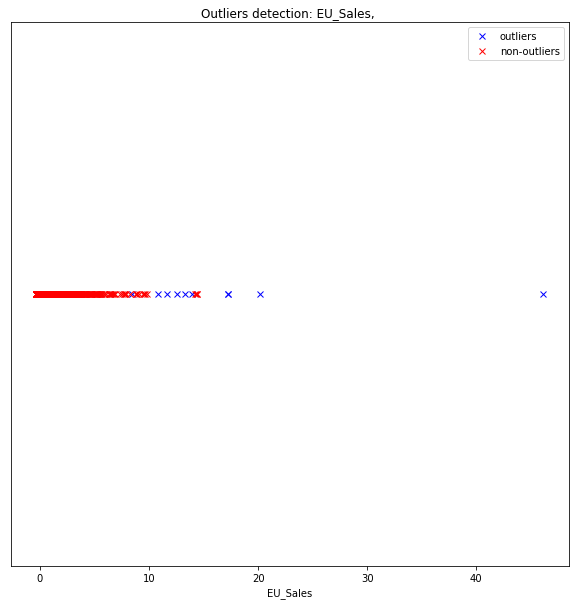

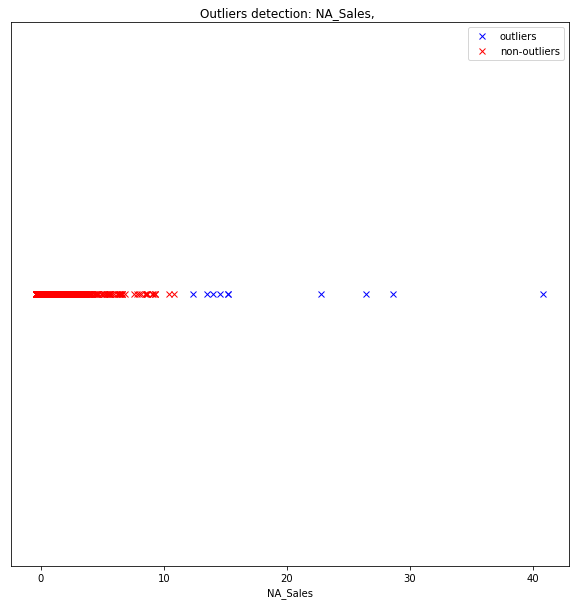

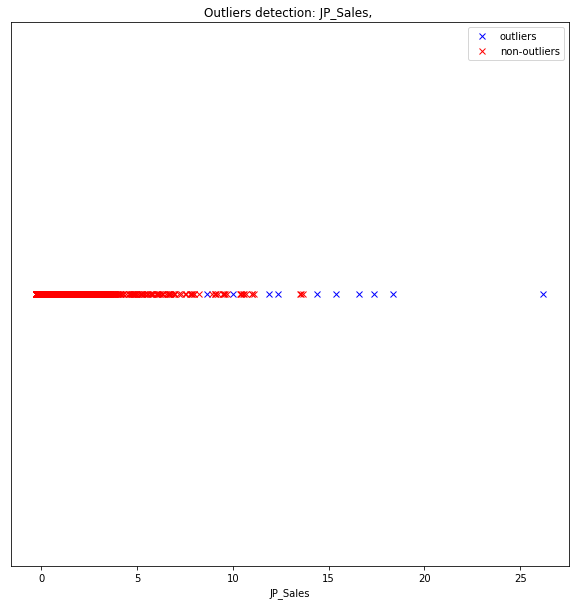

In [6]:
r_percentage = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
k_neighbours = [2, 2, 2, 2, 2, 2]
nearest_neighbours_columns = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]
outliers_for_each_column = []
for index, column in enumerate(nearest_neighbours_columns):
    outliers, non_outliers = find_outliers_in_single_column(data, column, k_neighbours[index], r_percentage[index])
    outliers_for_each_column.append(outliers)
    plot_1d_data_with_outliers(outliers, non_outliers, column)
    pretty_print_1d_outliers(outliers, column)

### Outliers - 2D

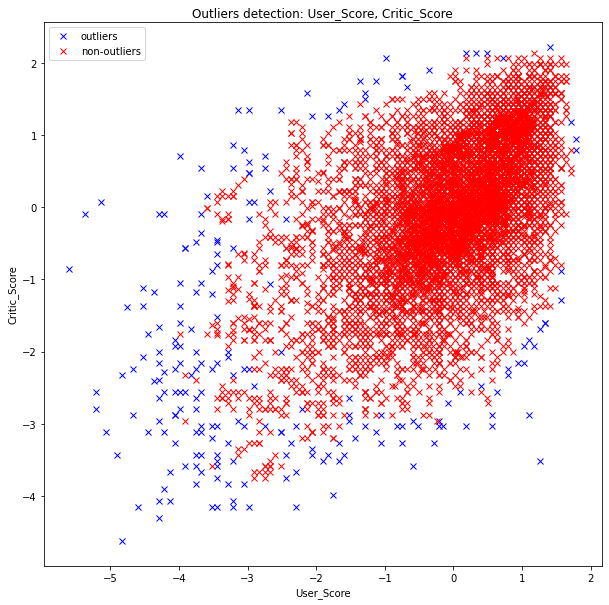

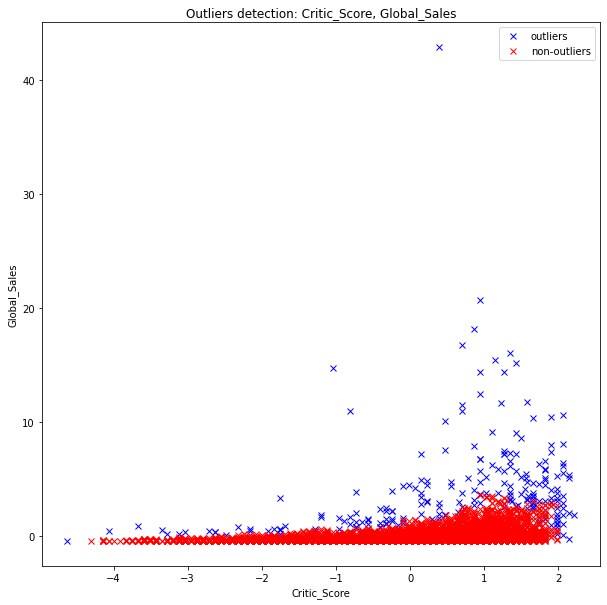

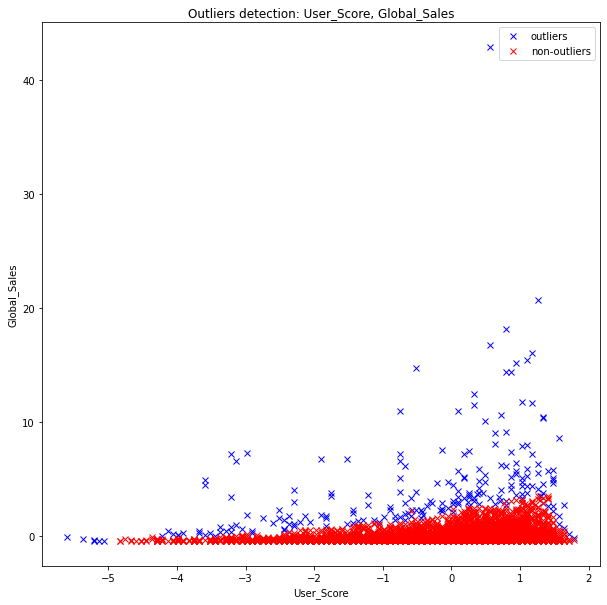

In [7]:
k_neighbours = 5
r_percentage = 0.02
nearest_neighbours_columns = [["User_Score", "Critic_Score"],
                              ["Critic_Score", "Global_Sales"],
                              ["User_Score", "Global_Sales"]]
outliers_for_each_pair = []
for column_pair in nearest_neighbours_columns:
    outliers, non_outliers = find_outliers_in_multiple_columns(data, column_pair, k_neighbours, r_percentage)
    outliers_for_each_pair.append(outliers)
    plot_2d_data_with_outliers(outliers, non_outliers, column_pair)

### Clustering 2D (K-means)

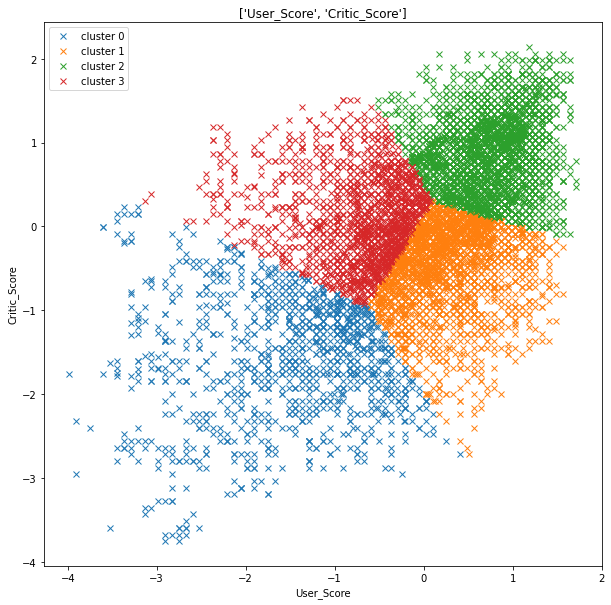

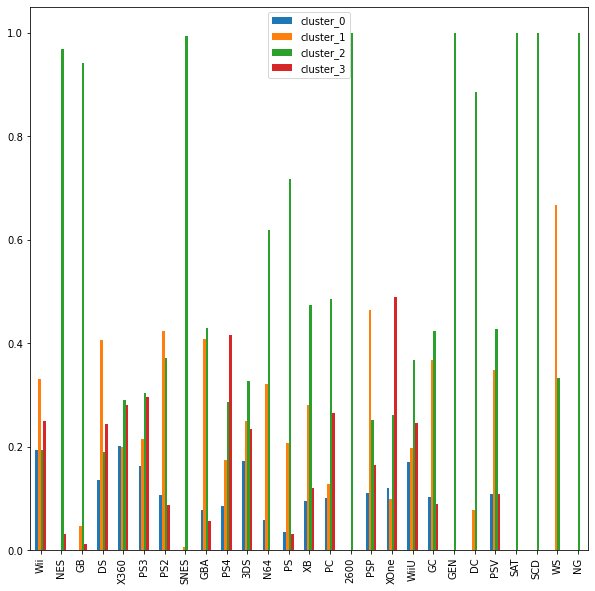

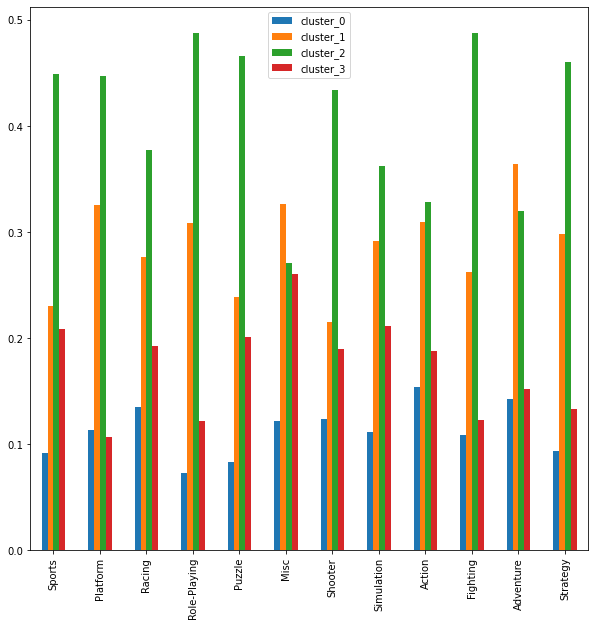

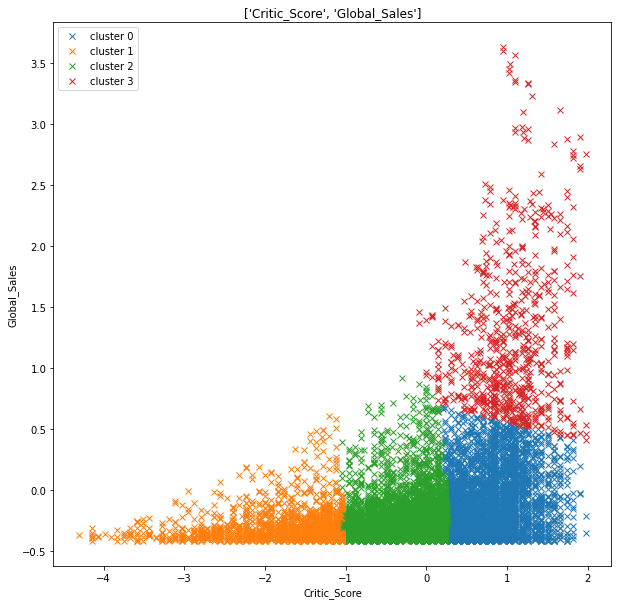

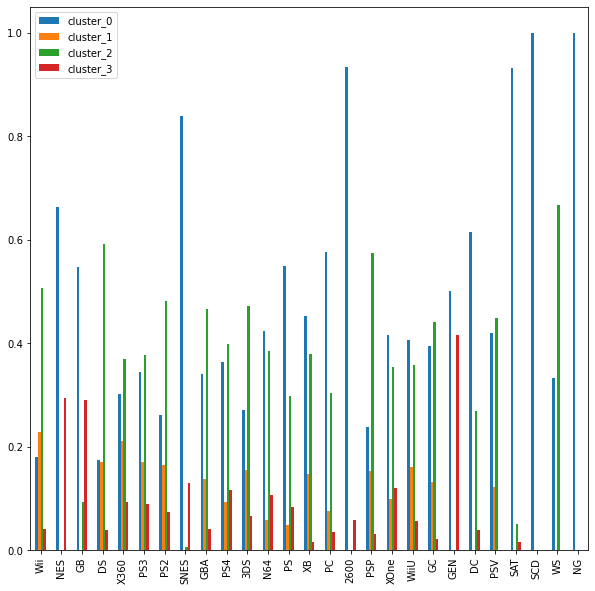

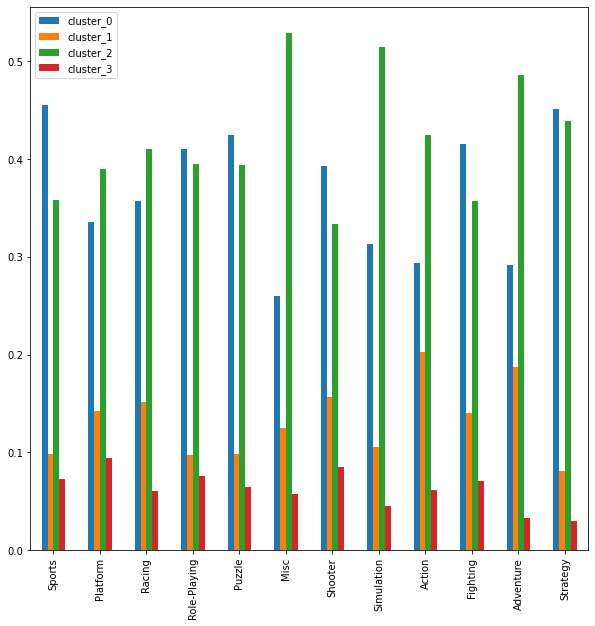

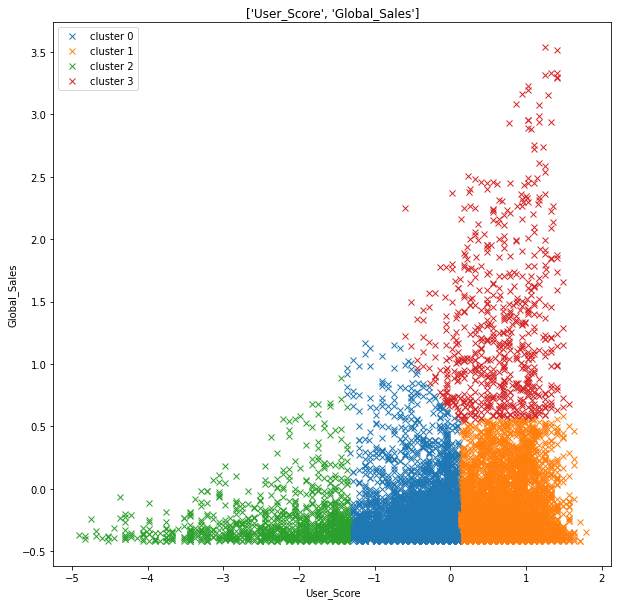

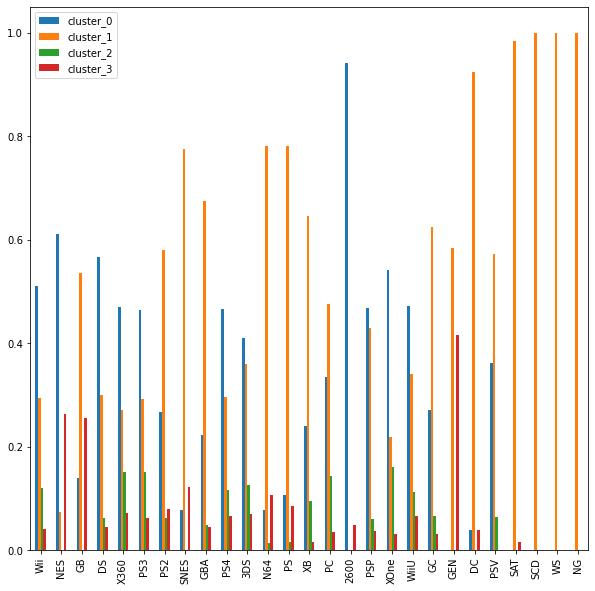

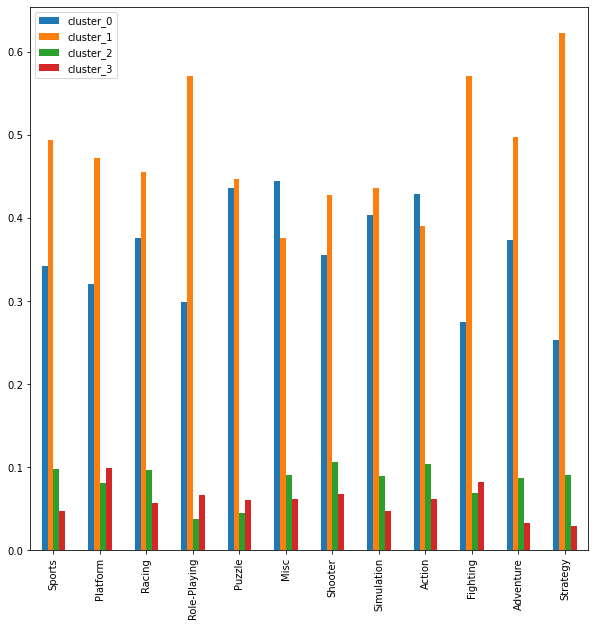

In [8]:
columns_to_analyze = ["Platform", "Genre"]
numbers_of_clusters = [4, 4, 4, 4, 4]
k_means_columns = [["User_Score", "Critic_Score"],
                   ["Critic_Score", "Global_Sales"],
                   ["User_Score", "Global_Sales"]]

for index, column_pair in enumerate(k_means_columns):
    data_without_outliers = drop_outliers_from_dataset(data, outliers_for_each_pair[index])
    clustered_data = k_means_multiple_dim_clustering(data_without_outliers, column_pair, numbers_of_clusters[index])
    plot_2d_data_with_clusters(clustered_data, column_pair)

    for column_to_analyze in columns_to_analyze:
        unique_values = data[column_to_analyze].unique()
        temp_data = pd.DataFrame(index=unique_values)
        for i in range(numbers_of_clusters[index]):
            cluster = clustered_data[clustered_data["cluster"] == i]
            number_of_entries_by_analyzed = cluster.filter([column_to_analyze, "Name"]).groupby([column_to_analyze]).agg(["count"])
            total_number_of_entries_by_analyzed = data.filter([column_to_analyze, "Name"]).groupby([column_to_analyze]).agg(["count"])
            temp_data["cluster_{}".format(i)] = number_of_entries_by_analyzed / total_number_of_entries_by_analyzed
        temp_data.plot.bar()